In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv("../input/ford-gobike-2019feb-tripdata/201902-fordgobike-tripdata.csv")

In [3]:
print (f'DataFrame Shape = {df.shape}')
df.head()

DataFrame Shape = (183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [10]:
df.duplicated().value_counts()

False    183412
dtype: int64

In [11]:
cols_drop = ['start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id']
df1 = df.drop(columns= cols_drop, axis = 1)
df1.shape

(183412, 9)

In [12]:
df1.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


In [13]:
df2 = df1.dropna()
df2.shape

(174952, 9)

In [14]:
df2.isna().sum()

duration_sec               0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
df2['member_birth_year'].value_counts()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
          ...  
1928.0        1
1927.0        1
1910.0        1
1930.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [16]:
id = df2[df2['member_birth_year']== 1878]
id

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,15.0,San Francisco Ferry Building (Harry Bridges Pl...,386.0,24th St at Bartlett St,Customer,1878.0,Female,No


In [17]:
df3  = df2.drop(index = id.index, axis =0)
df3.shape

(174951, 9)

In [18]:
df3['duration_min'] = df3['duration_sec']/60
df3.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333


In [19]:
df3['duration_min'] = df3['duration_sec']/60
df3.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333


In [20]:
drop_cols = ['duration_sec', 'member_birth_year']
df_final = df3.drop(columns = drop_cols, axis = 1)
df_final.head()

,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,duration_min
0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,Male,No,869.750000
2,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,Male,No,1030.900000
3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,Other,No,608.166667
4,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,Male,Yes,26.416667
5,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,Male,No,29.883333


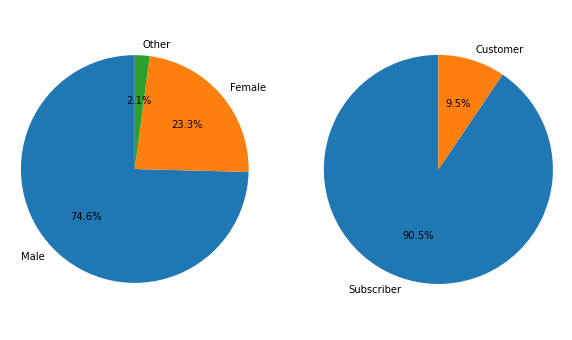

In [21]:
plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
sorted_gender = df_final['member_gender'].value_counts()
plt.pie(sorted_gender, labels=sorted_gender.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square')

plt.subplot(1,2,2)
sorted_type = df_final['user_type'].value_counts()
plt.pie(sorted_type, labels = sorted_type.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal');

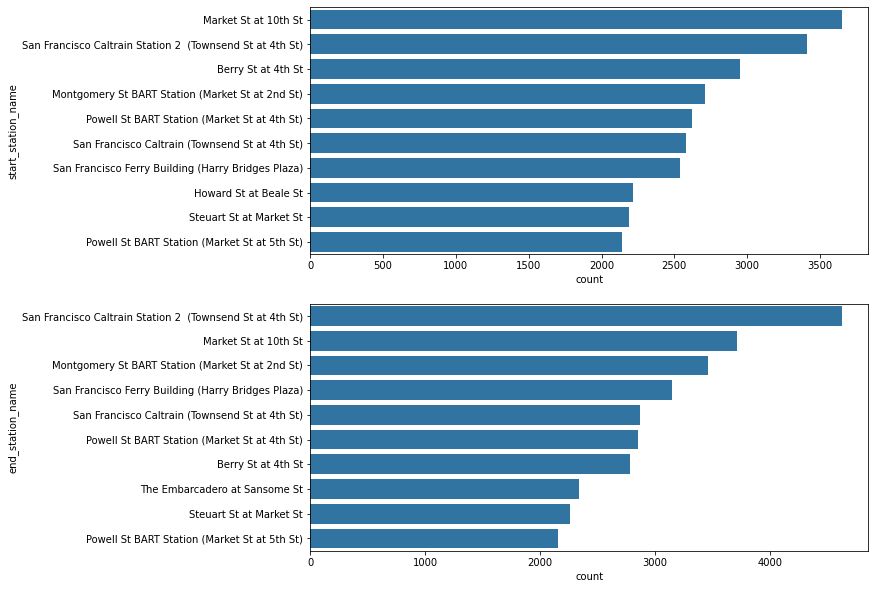

In [22]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 10])
plt.subplot(2,1,1)
start_order = df_final['start_station_name'].value_counts()[:10]
df_start = df_final.loc[df_final['start_station_name'].isin(start_order.index)]
sb.countplot(data = df_start, y = 'start_station_name', order = start_order.index, color = base_color)
plt.subplot(2,1,2)
end_order = df_final['end_station_name'].value_counts()[:10]
df_end = df_final.loc[df_final['end_station_name'].isin(end_order.index)]
sb.countplot(data = df_end, y = 'end_station_name', order = end_order.index, color = base_color);

In [23]:
df_final['duration_min'].describe()

count    174951.000000
mean         11.733306
std          27.370143
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

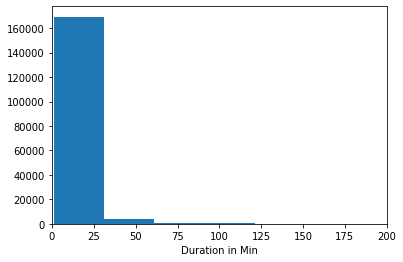

In [24]:
bins = np.arange(df_final['duration_min'].min(), df_final['duration_min'].max()+ 30, 30)
plt.hist(df_final['duration_min'], bins = bins)
plt.xlabel ('Duration in Min')
plt.xlim((0,200));